In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('C:/Users/yifeichongtian/Desktop/UCL course material/web economics/dataset/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


In [4]:
train.click.value_counts()

0    2695704
1       2034
Name: click, dtype: int64

In [5]:
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert the object features to numeric values
train["useragent"] = label_encoder.fit_transform(train["useragent"])

In [6]:
len(train.weekday.value_counts())

7

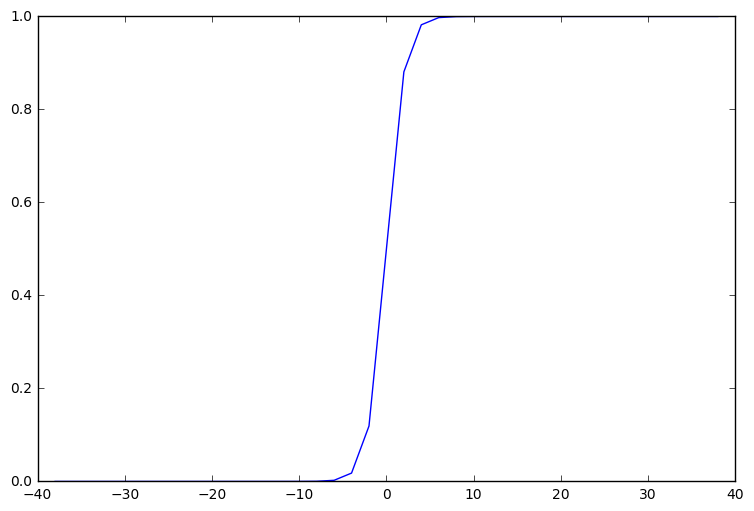

In [7]:
fig=plt.figure(figsize=(9,6))
xx1=np.linspace(-train["useragent"].max(), train["useragent"].max(),39)
yy1=1/(1+np.exp(-xx1))
plt.plot(xx1,yy1,'b')
plt.show()

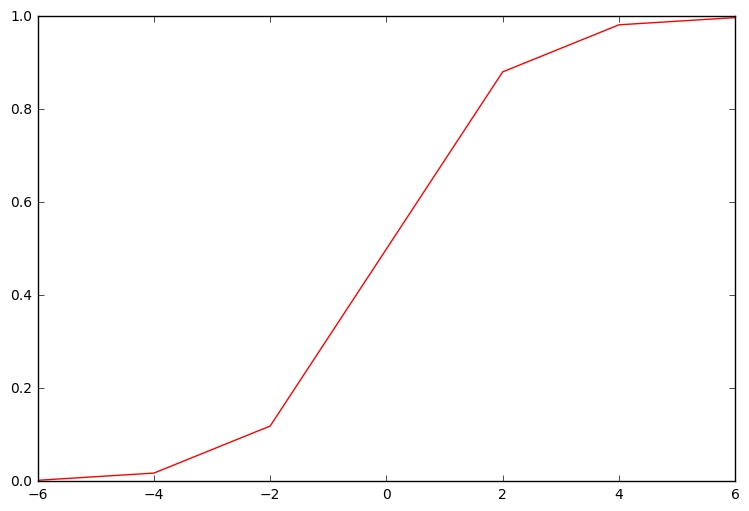

In [8]:
fig=plt.figure(figsize=(9,6))
xx=np.linspace(-train["weekday"].max(),train["weekday"].max(),7)
yy=1/(1+np.exp(-xx))
plt.plot(xx,yy,'r')
plt.show()

In [9]:
len(train.advertiser.value_counts())

9

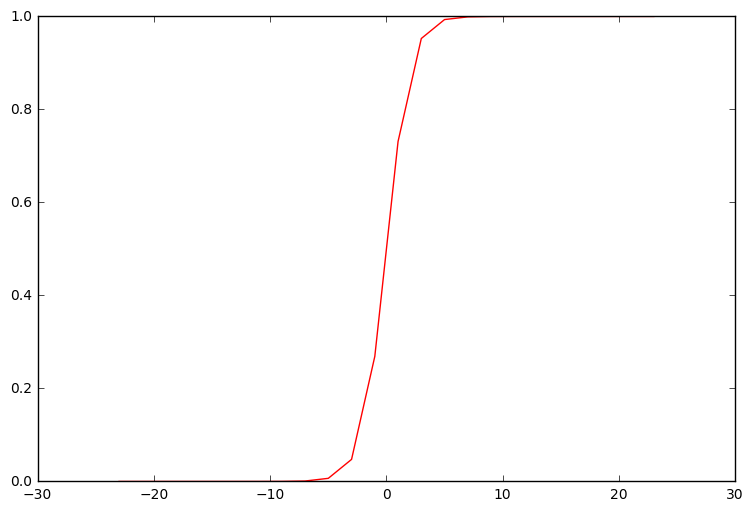

In [10]:
fig=plt.figure(figsize=(9,6))
xx=np.linspace(-train["hour"].max(),train["hour"].max(),24)
yy=1/(1+np.exp(-xx))
plt.plot(xx,yy,'r')
plt.show()

In [11]:
train.advertiser.value_counts()

1458    540293
3386    498554
3427    454031
3476    346778
3358    304782
2821    231416
2259    146778
2261    120619
2997     54487
Name: advertiser, dtype: int64

In [12]:
train["intercept"]=1
features=["useragent","weekday","hour","intercept"]
x=train[features]
y=train["click"]

In [13]:
print (type(x))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Logistic regression

In [14]:
# run the logistic regression for 'x' and 'y' 
import statsmodels.api as sm
logit=sm.Logit(y,x)

# displaying the result of logistic regression
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.006010
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  click   No. Observations:              2697738
Model:                          Logit   Df Residuals:                  2697734
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                 0.02668
Time:                        22:12:35   Log-Likelihood:                -16214.
converged:                       True   LL-Null:                       -16658.
                                        LLR p-value:                2.224e-192
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
useragent     -0.0826      0.002    -35.887      0.000        -0.087    -0.078
weekday       -0.0132      0

In [15]:
# 'params' means 'parameters'
print(result.params)

useragent   -0.082584
weekday     -0.013247
hour         0.009007
intercept   -4.886327
dtype: float64


In [16]:
# odds ratio : it means the impact of changing in each unit of variable on the 'click'.
print (np.exp(result.params))

useragent    0.920734
weekday      0.986841
hour         1.009048
intercept    0.007549
dtype: float64


In [17]:
w0=result.params[0]
w1=result.params[1]
w2=result.params[2]
w3=result.params[3]

x0=train["useragent"]
x1=train["weekday"]
x2=train["hour"]

In [18]:
def predict():
    return 1/(1+np.e**-(w0*x0+w1*x1+w2*x2+w3))
c=predict()
c=c>0.006010 # set a threshold
c.value_counts()

False    2696925
True         813
dtype: int64

In [19]:
train.click.value_counts()

0    2695704
1       2034
Name: click, dtype: int64

In [20]:
difference=c-train.click
c=pd.DataFrame(c)
c.columns=['click']
c['click']=label_encoder.fit_transform(c['click'])
print ('below is the difference betwen predicted and real click value')
print (difference.value_counts())
precision=difference.value_counts()[0]/(difference.value_counts()[0]
                                        +difference.value_counts()[1]
                                        +difference.value_counts()[-1])
print ()
print ('precision')
precision

below is the difference betwen predicted and real click value
 0    2694897
-1       2031
 1        810
dtype: int64

precision


0.99894689551023863

In [21]:
validation=pd.read_csv('C:/Users/yifeichongtian/Desktop/UCL course material/web economics/dataset/validation.csv')

In [22]:
validation["useragent"]=label_encoder.fit_transform(validation["useragent"])

In [23]:
x00=validation["useragent"]
x01=validation["weekday"]
x02=validation["hour"]

In [24]:
def validation_predict():
    return 1/(1+np.e**-(w0*x00+w1*x01+w2*x02+w3))
b=validation_predict()
b=b>0.006010
b.value_counts()

False    299668
True         81
dtype: int64

In [25]:
validation.click.value_counts()

0    299523
1       226
Name: click, dtype: int64

In [26]:
b=pd.DataFrame(b)
b.columns=['click']
b['click']=label_encoder.fit_transform(b['click'])
print (type(b['click']))
print (type(validation.click))
difference_validation=b['click']-validation.click
print (difference_validation.value_counts())
precision_for_validation_clickvalue=difference_validation.value_counts()[0]/(difference_validation.value_counts()[0]
                                                  +difference_validation.value_counts()[1]
                                                  +difference_validation.value_counts()[-1])
print (precision_for_validation_clickvalue)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
 0    299442
-1       226
 1        81
Name: click, dtype: int64
0.998975809761


In [27]:
b.click.value_counts()

0    299668
1        81
Name: click, dtype: int64

In [28]:
new_validation=validation.drop(['click'],axis=1)
new_validation1=pd.concat([b.click, new_validation],axis=1)
new_validation1[new_validation1.advertiser==1458].click.value_counts()

0    60007
1       18
Name: click, dtype: int64

In [29]:
validation[validation.advertiser==1458].click.value_counts()

0    59975
1       50
Name: click, dtype: int64

In [30]:
difference_validation_1458=new_validation1[new_validation1.advertiser==1458].click-validation[validation.advertiser==1458].click
print (difference_validation_1458.value_counts())
precision_validation_1458=difference_validation_1458.value_counts()[0]/(difference_validation_1458.value_counts()[1]+difference_validation_1458.value_counts()[-1]+difference_validation_1458.value_counts()[0])
precision_validation_1458

 0    59957
-1       50
 1       18
Name: click, dtype: int64


0.99886713869221155

In [31]:
difference_validation_3386=new_validation1[new_validation1.advertiser==3386].click-validation[validation.advertiser==3386].click
print (difference_validation_3386.value_counts())
precision_validation_3386=difference_validation_3386.value_counts()[0]/(difference_validation_3386.value_counts()[1]+difference_validation_3386.value_counts()[-1]+difference_validation_3386.value_counts()[0])
precision_validation_3386

 0    55155
-1       33
 1        8
Name: click, dtype: int64


0.99925719255018475

In [32]:
difference_validation_3427=new_validation1[new_validation1.advertiser==3427].click-validation[validation.advertiser==3427].click
print (difference_validation_3427.value_counts())
precision_validation_3427=difference_validation_3427.value_counts()[0]/(difference_validation_3427.value_counts()[1]+difference_validation_3427.value_counts()[-1]+difference_validation_3427.value_counts()[0])
precision_validation_3427

 0    50331
-1       45
 1        5
Name: click, dtype: int64


0.99900756237470478

In [33]:
difference_validation_3476=new_validation1[new_validation1.advertiser==3476].click-validation[validation.advertiser==3476].click
print (difference_validation_3476.value_counts())
precision_validation_3476=difference_validation_3476.value_counts()[0]/(difference_validation_3476.value_counts()[1]+difference_validation_3476.value_counts()[-1]+difference_validation_3476.value_counts()[0])
precision_validation_3476

 0    38824
-1       13
 1        2
Name: click, dtype: int64


0.99961379026236519

In [34]:
difference_validation_3358=new_validation1[new_validation1.advertiser==3358].click-validation[validation.advertiser==3358].click
print (difference_validation_3358.value_counts())
precision_validation_3358=difference_validation_3358.value_counts()[0]/(difference_validation_3358.value_counts()[1]+difference_validation_3358.value_counts()[-1]+difference_validation_3358.value_counts()[0])
precision_validation_3358

 0    33819
-1       27
 1        7
Name: click, dtype: int64


0.99899565769651144

In [35]:
difference_validation_2821=new_validation1[new_validation1.advertiser==2821].click-validation[validation.advertiser==2821].click
print (difference_validation_2821.value_counts())
precision_validation_2821=difference_validation_2821.value_counts()[0]/(difference_validation_2821.value_counts()[1]+difference_validation_2821.value_counts()[-1]+difference_validation_2821.value_counts()[0])
precision_validation_2821

 0    25599
 1       17
-1       16
Name: click, dtype: int64


0.99871254681647936

In [36]:
difference_validation_2259=new_validation1[new_validation1.advertiser==2259].click-validation[validation.advertiser==2259].click
print (difference_validation_2259.value_counts())
precision_validation_2259=difference_validation_2259.value_counts()[0]/(difference_validation_2259.value_counts()[1]+difference_validation_2259.value_counts()[-1]+difference_validation_2259.value_counts()[0])
precision_validation_2259

 0    16407
-1       11
 1        1
Name: click, dtype: int64


0.99926913941165718

In [37]:
difference_validation_2261=new_validation1[new_validation1.advertiser==2261].click-validation[validation.advertiser==2261].click
print (difference_validation_2261.value_counts())
precision_validation_2261=difference_validation_2261.value_counts()[0]/(difference_validation_2261.value_counts()[1]+difference_validation_2261.value_counts()[-1]+difference_validation_2261.value_counts()[0])
precision_validation_2261

 0    13363
-1        5
 1        2
Name: click, dtype: int64


0.99947643979057588

In [38]:
new_validation1.advertiser.value_counts()

1458    60025
3386    55196
3427    50381
3476    38839
3358    33853
2821    25632
2259    16419
2261    13370
2997     6034
Name: advertiser, dtype: int64

In [39]:
difference_validation_2997=new_validation1[new_validation1.advertiser==2997].click-validation[validation.advertiser==2997].click
print (difference_validation_2997.value_counts())
precision_validation_2997=difference_validation_2997.value_counts()[0]/(difference_validation_2997.value_counts()[1]+difference_validation_2997.value_counts()[-1]+difference_validation_2997.value_counts()[0])
precision_validation_2997

 0    5987
-1      26
 1      21
Name: click, dtype: int64


0.99221080543586349

In [40]:
test=pd.read_csv('C:/Users/yifeichongtian/Desktop/UCL course material/web economics/dataset/test.csv')

In [41]:
test["useragent"]=label_encoder.fit_transform(test["useragent"])

In [43]:
x_0=test["useragent"]
x_1=test["weekday"]
x_2=test["hour"]

def test_prediction():
    return 1/(1+np.e**-(w0*x_0+w1*x_1+w2*x_2+w3))
a=test_prediction()
a=a>0.006010
a.value_counts()

False    299474
True        275
dtype: int64

In [44]:
from pandas import DataFrame
test_click=pd.DataFrame(a)
test_click.columns=['click']
submission=pd.concat([test_click.click, test],axis=1)
submission["click"]=label_encoder.fit_transform(submission["click"])
submission.click.value_counts()

0    299474
1       275
Name: click, dtype: int64

In [45]:
submission.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [46]:
submission.advertiser.value_counts()

1458    59789
3386    55559
3427    50149
3476    38630
3358    34038
2821    25628
2259    16276
2261    13499
2997     6181
Name: advertiser, dtype: int64

In [47]:
# for test
CTR_1458=submission[submission.advertiser==1458].click.value_counts()[1]/(submission[submission.advertiser==1458].click.value_counts()[0]+submission[submission.advertiser==1458].click.value_counts()[1])
print ('CTR_1458',":",CTR_1458)
CTR_3386=submission[submission.advertiser==3386].click.value_counts()[1]/(submission[submission.advertiser==3386].click.value_counts()[0]+submission[submission.advertiser==3386].click.value_counts()[1])
print ('CTR_3386',":",CTR_3386)
CTR_3427=submission[submission.advertiser==3427].click.value_counts()[1]/(submission[submission.advertiser==3427].click.value_counts()[0]+submission[submission.advertiser==3427].click.value_counts()[1])
print ('CTR_3427',":",CTR_3427)
CTR_3476=submission[submission.advertiser==3476].click.value_counts()[1]/(submission[submission.advertiser==3476].click.value_counts()[0]+submission[submission.advertiser==3476].click.value_counts()[1])
print ('CTR_3476',":",CTR_3476)
CTR_3358=submission[submission.advertiser==3358].click.value_counts()[1]/(submission[submission.advertiser==3358].click.value_counts()[0]+submission[submission.advertiser==3358].click.value_counts()[1])
print ('CTR_3358',":",CTR_3358)
CTR_2821=submission[submission.advertiser==2821].click.value_counts()[1]/(submission[submission.advertiser==2821].click.value_counts()[0]+submission[submission.advertiser==2821].click.value_counts()[1])
print ('CTR_2821',":",CTR_2821)
CTR_2259=submission[submission.advertiser==2259].click.value_counts()[1]/(submission[submission.advertiser==2259].click.value_counts()[0]+submission[submission.advertiser==2259].click.value_counts()[1])
print ('CTR_2259',":",CTR_2259)
CTR_2261=submission[submission.advertiser==2261].click.value_counts()[1]/(submission[submission.advertiser==2261].click.value_counts()[0]+submission[submission.advertiser==2261].click.value_counts()[1])
print ('CTR_2261',":",CTR_2261)
CTR_2997=submission[submission.advertiser==2997].click.value_counts()[1]/(submission[submission.advertiser==2997].click.value_counts()[0]+submission[submission.advertiser==2997].click.value_counts()[1])
print ('CTR_2997',":",CTR_2997)

CTR_1458 : 0.000618842930974
CTR_3386 : 0.000485969869868
CTR_3427 : 0.000378870964526
CTR_3476 : 7.76598498576e-05
CTR_3358 : 0.000793231094659
CTR_2821 : 0.00296550647729
CTR_2259 : 0.000491521258294
CTR_2261 : 0.000222238684347
CTR_2997 : 0.0121339589063


In [49]:
# for validation
CTR1458=validation[validation.advertiser==1458].click.value_counts()[1]/(validation[validation.advertiser==1458].click.value_counts()[0]+validation[validation.advertiser==1458].click.value_counts()[1])
print ('CTR1458',":",CTR1458)
CTR3386=validation[validation.advertiser==3386].click.value_counts()[1]/(validation[validation.advertiser==3386].click.value_counts()[0]+validation[validation.advertiser==3386].click.value_counts()[1])
print ('CTR3386',":",CTR3386)
CTR3427=validation[validation.advertiser==3427].click.value_counts()[1]/(validation[validation.advertiser==3427].click.value_counts()[0]+validation[validation.advertiser==3427].click.value_counts()[1])
print ('CTR3427',":",CTR3427)
CTR3476=validation[validation.advertiser==3476].click.value_counts()[1]/(validation[validation.advertiser==3476].click.value_counts()[0]+validation[validation.advertiser==3476].click.value_counts()[1])
print ('CTR3476',":",CTR3476)
CTR3358=validation[validation.advertiser==3358].click.value_counts()[1]/(validation[validation.advertiser==3358].click.value_counts()[0]+validation[validation.advertiser==3358].click.value_counts()[1])
print ('CTR3358',":",CTR3358)
CTR2821=validation[validation.advertiser==2821].click.value_counts()[1]/(validation[validation.advertiser==2821].click.value_counts()[0]+validation[validation.advertiser==2821].click.value_counts()[1])
print ('CTR2821',":",CTR2821)
CTR2259=validation[validation.advertiser==2259].click.value_counts()[1]/(validation[validation.advertiser==2259].click.value_counts()[0]+validation[validation.advertiser==2259].click.value_counts()[1])
print ('CTR2259',":",CTR2259)
CTR2261=validation[validation.advertiser==2261].click.value_counts()[1]/(validation[validation.advertiser==2261].click.value_counts()[0]+validation[validation.advertiser==2261].click.value_counts()[1])
print ('CTR2261',":",CTR2261)
CTR2997=validation[validation.advertiser==2997].click.value_counts()[1]/(validation[validation.advertiser==2997].click.value_counts()[0]+validation[validation.advertiser==2997].click.value_counts()[1])
print ('CTR2997',":",CTR2997)

CTR1458 : 0.000832986255727
CTR3386 : 0.000597869410827
CTR3427 : 0.000893193862766
CTR3476 : 0.00033471510595
CTR3358 : 0.000797565946888
CTR2821 : 0.000624219725343
CTR2259 : 0.000669955539314
CTR2261 : 0.00037397157816
CTR2997 : 0.00430891614186


In [50]:
print ('bidprice for 1458')
print (validation[validation.advertiser==1458].bidprice.value_counts())
print ()
print ('bidprice for 3386')
print (validation[validation.advertiser==3386].bidprice.value_counts())
print ()
print ('bidprice for 3427')
print (validation[validation.advertiser==3427].bidprice.value_counts())
print ()
print ('bidprice for 3476')
print (validation[validation.advertiser==3476].bidprice.value_counts())
print ()
print ('bidprice for 3358')
print (validation[validation.advertiser==3358].bidprice.value_counts())
print ()
print ('bidprice for 2821')
print (validation[validation.advertiser==2821].bidprice.value_counts())
print ()
print ('bidprice for 2259')
print (validation[validation.advertiser==2259].bidprice.value_counts())
print ()
print ('bidprice for 2261')
print (validation[validation.advertiser==2261].bidprice.value_counts())
print ()
print ('bidprice for 2997')
print (validation[validation.advertiser==2997].bidprice.value_counts())

bidprice for 1458
300    60025
Name: bidprice, dtype: int64

bidprice for 3386
300    55196
Name: bidprice, dtype: int64

bidprice for 3427
241    19350
238    17454
227    13577
Name: bidprice, dtype: int64

bidprice for 3476
254    14636
249    13086
238    11117
Name: bidprice, dtype: int64

bidprice for 3358
227    17890
238    10215
241     5748
Name: bidprice, dtype: int64

bidprice for 2821
294    19986
277     5646
Name: bidprice, dtype: int64

bidprice for 2259
294    10679
277     5740
Name: bidprice, dtype: int64

bidprice for 2261
294    8591
277    4779
Name: bidprice, dtype: int64

bidprice for 2997
277    6034
Name: bidprice, dtype: int64


### linear bidding strategy

In [51]:
train.advertiser.value_counts()

1458    540293
3386    498554
3427    454031
3476    346778
3358    304782
2821    231416
2259    146778
2261    120619
2997     54487
Name: advertiser, dtype: int64

In [53]:
base_bid_1458=300
pCTR_1458=CTR_1458
bid_price_1458=base_bid_1458*pCTR_1458/CTR1458
bid_price_1458

222.87628159025908

In [54]:
base_bid_3386=300
pCTR_3386=CTR_3386
bid_price_3386=base_bid_3386*pCTR_3386/CTR3386
bid_price_3386

243.85084488398084

In [55]:
validation[validation.advertiser==3427].bidprice.value_counts()

241    19350
238    17454
227    13577
Name: bidprice, dtype: int64

In [58]:
H=[241,238,227]
for base_bid_3427 in H:
    pCTR_3427 = CTR_3427
    bid_price_3427=base_bid_3427*pCTR_3427/CTR3427
    print (bid_price_3427)
list_3427=[102.226298519, 100.953771982, 96.2878413439]

102.226298519
100.953771982
96.2878413439


In [54]:
validation[validation.advertiser==3476].bidprice.value_counts()

254    14636
249    13086
238    11117
Name: bidprice, dtype: int64

In [118]:
H=[254,249,238]
for base_bid_3476 in H:
    pCTR_3476 = CTR_3476
    bid_price_3476=base_bid_3476*pCTR_3476/CTR3476
    print (bid_price_3476)
list_3476=[58.9325115992, 57.7724227882, 55.220227404]

58.9325115992
57.7724227882
55.220227404


In [60]:
validation[validation.advertiser==3358].bidprice.value_counts()

227    17890
238    10215
241     5748
Name: bidprice, dtype: int64

In [62]:
H=[227,238,241]
for base_bid_3358 in H:
    pCTR_3358 = CTR_3358
    bid_price_3358=base_bid_3358*pCTR_3358/CTR3358
    print (bid_price_3358)
list_3358=[225.766231859, 236.706445737, 239.690140431]

225.766231859
236.706445737
239.690140431


In [63]:
validation[validation.advertiser==2821].bidprice.value_counts()

294    19986
277     5646
Name: bidprice, dtype: int64

In [66]:
H=[294,277]
for base_bid_2821 in H:
    pCTR_2821 = CTR_2821
    bid_price_2821=base_bid_2821*pCTR_2821/CTR2821
    print (bid_price_2821)
list_2821=[1396.71796473, 1315.95536132]

1396.71796473
1315.95536132


In [67]:
validation[validation.advertiser==2259].bidprice.value_counts()

294    10679
277     5740
Name: bidprice, dtype: int64

In [69]:
H=[294,277]
for base_bid_2259 in H:
    pCTR_2259 = CTR_2259
    bid_price_2259=base_bid_2259*pCTR_2259/CTR2259
    print (bid_price_2259)
list_2259=[215.696776067, 203.224513506]

215.696776067
203.224513506


In [70]:
validation[validation.advertiser==2261].bidprice.value_counts()

294    8591
277    4779
Name: bidprice, dtype: int64

In [72]:
H=[294,277]
for base_bid_2261 in H:
    pCTR_2261 = CTR_2261
    bid_price_2261=base_bid_2261*pCTR_2261/CTR2261
    print (bid_price_2261)
list_2261=[174.714275131, 164.611749018]

174.714275131
164.611749018


In [73]:
validation[validation.advertiser==2997].bidprice.value_counts()

277    6034
Name: bidprice, dtype: int64

In [76]:
base_bid_2997=277
pCTR_2997 = CTR_2997
bid_price_2997=base_bid_2997*pCTR_2997/CTR2997
print (bid_price_2997)

780.035281819


In [77]:
submission["bidprice"]=1

In [78]:
submission.advertiser.value_counts()

1458    59789
3386    55559
3427    50149
3476    38630
3358    34038
2821    25628
2259    16276
2261    13499
2997     6181
Name: advertiser, dtype: int64

In [79]:
## in order to minimize the cost, pick the minimized bidprice for each ads
submission.loc[submission.advertiser==1458, "bidprice":]=bid_price_1458
submission.loc[submission.advertiser==3386, "bidprice":]=bid_price_3386
submission.loc[submission.advertiser==3427, "bidprice":]=min(list_3427)
submission.loc[submission.advertiser==3476, "bidprice":]=min(list_3476)
submission.loc[submission.advertiser==3358, "bidprice":]=min(list_3358)
submission.loc[submission.advertiser==2821, "bidprice":]=min(list_2821)
submission.loc[submission.advertiser==2259, "bidprice":]=min(list_2259)
submission.loc[submission.advertiser==2261, "bidprice":]=min(list_2261)
submission.loc[submission.advertiser==2997, "bidprice":]=bid_price_2997
submission.bidprice.value_counts()

222.876282     59789
243.850845     55559
96.287841      50149
55.220227      38630
225.766232     34038
1315.955361    25628
203.224514     16276
164.611749     13499
780.035282      6181
Name: bidprice, dtype: int64

In [80]:
total_cost=sum(submission.bidprice)/1000
print ('total_accumulated_cost',":",total_cost,'CNY fen')

total_accumulated_cost : 85596.6646898 CNY fen


In [103]:
# Budget < 25000 CNY fen
sum(submission.bidprice[0:87823]/1000)

24999.872615198215

In [111]:
final_features=["bidid","bidprice"]
final_submission=submission[0:87823][final_features]
Group_26=final_submission
Group_26

,bidid,bidprice
0,fe2e06dff1dfd227471fd1ca717888ac,96.287841
1,92ea762b7b2cfd7aee30a2e88e1f5899,222.876282
2,617dfab714eedf4988c4aa9ad5425eca,96.287841
3,7fa016aaa3db39413b482f757facc3f4,243.850845
4,49db062ac10d19591dc7d988d730aad5,55.220227
5,6d86a43fbda12fc89c98620f4d8aedc1,1315.955361
6,3b6b3f3227d42ad74971be4b9a26c189,96.287841
7,2cc65c3a9f97620d33d4c3ddfb368869,203.224514
8,be487ced968062be378892fc87013ff9,222.876282
9,7f7a7e763db7ec8123ddeb8a8c90689f,96.287841


In [134]:
comparison=pd.concat([Group_26.describe(),pd.DataFrame(validation.bidprice.describe())],axis=1)
comparison

,bidprice,bidprice
count,87823.000000,299749.000000
mean,284.662020,272.412385
std,332.544270,29.119975
min,55.220227,227.000000
25%,96.287841,241.000000
50%,222.876282,294.000000
75%,243.850845,300.000000
max,1315.955361,300.000000


In [136]:
# save your data to csv
final_submission.to_csv('C:/Users/yifeichongtian/Desktop/UCL course material/web economics/dataset/Group_26.csv')